<a href="https://colab.research.google.com/github/thecrazyphysicist369/Content-Emotion-Model/blob/main/code/Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 1.3MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import sklearn
import nltk.collocations 
from nltk import FreqDist, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import string, re
import urllib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#nltk.download('punkt')
#nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('all-corpora')
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk.corpus import wordnet   #Import wordnet from the NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk import ngrams
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText



from matplotlib import rcParams
from matplotlib.patches import Rectangle
from scipy.stats import relfreq
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from wordcloud import WordCloud

import textblob
from textblob import TextBlob


In [ ]:
from google.colab import files

files.upload()

Saving lyrics.csv to lyrics.csv


{'lyrics.csv': b'Song,Lyrics\nKillshot,"You sound like a bitch, bitch Shut the fuck up! When your fans become your haters You done? Fuckin\' beard\'s weird Alright You yellin\' at the mic, fuckin\' weird beard We doin\' this once (You yellin\' at the mic, your beard\'s weird) Why you yell at the mic? (Illa) Rihanna just hit me on a text Last night I left hickeys on her neck Wait, you just dissed me? I\'m perplexed Insult me in a line, compliment me on the next Damn, I\'m really sorry you want me to have a heart attack Was watchin\' 8 Mile on my NordicTrack Realized I forgot to call you back Here\'s that autograph for your daughter I wrote it on a Starter cap Stan, Stan, son Listen, man, Dad isn\'t mad But how you gonna name yourself After a damn gun and have a man-bun? The giant\'s woke, eyes open, undeniable Supplyin\' smoke, got the fire stoked Say you got me in a scope, but you grazed me I say one call to Interscope and you\'re Swayze Your reply got the crowd yelling, woo! So before

In [ ]:
!cp /content/kaggle.json ../root/.kaggle/

!kaggle datasets download -d saiyan6174/eminem-lyrics

cp: cannot stat '/content/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip '/content/eminem-lyrics.zip' 

unzip:  cannot find or open /content/eminem-lyrics.zip, /content/eminem-lyrics.zip.zip or /content/eminem-lyrics.zip.ZIP.


In [ ]:
df = pd.read_csv('/content/lyrics.csv')
df.head()


,Song,Lyrics
0,Killshot,"You sound like a bitch, bitch Shut the fuck up..."
1,The-Adventures-of-Moon-Man-Slim-Shady-Eminem,"Yep (Aww) Yep (Mmm-aww), uh-huh Yeah, nigga Ye..."
2,Legacy,"Tell me where to go, tell me what to do I'll b..."
3,No-Love,"Love, love Love, love, love Don't hurt me Don'..."
4,Just-Lose-It,"Down, down, down! Okay Guess who's back? Back ..."


In [ ]:
df.loc[0, 'Lyrics']


In [ ]:
df['characters'] = df.Lyrics.str.len()
df['words'] = df.Lyrics.str.split().str.len()
df['unique_words'] = df.Lyrics.apply(lambda x: len(set (x.split())))  

In [ ]:
df.head()


In [ ]:
df.hist(sharey=True, layout=(2, 3), figsize=(15, 8));


In [ ]:
pd.Series([w for w in ' '.join(df.Lyrics).lower().split() if len(w) > 7]).value_counts()[:20][::-1].plot(kind='barh')

In [ ]:
# Function to get ngrams
def get_ngrams_from_series(series, n=2):
    # using nltk.ngrams
    lines = ' '.join(series).lower().split('\n')
    lgrams = [ngrams(l.split(), n) for l in lines]
    grams = [[' '.join(g) for g in list(lg)] for lg in lgrams]
    return [item for sublist in grams for item in sublist]

In [ ]:
# get trigrams
pd.Series(get_ngrams_from_series(df.Lyrics, 3)).value_counts()[:20][::-1].plot(kind='barh')

In [ ]:
pd.Series(get_ngrams_from_series(df.Lyrics, 4)).value_counts()[:20][::-1].plot(kind='barh')


In [ ]:
stop_words = set(stopwords.words('english')) 
for lyrics in df['Lyrics']:
  print("\n")
  print("\n")
  print("\n")
  print("\n")
  print(lyrics)
  tokenized = sent_tokenize(lyrics) 
  for i in tokenized: 
    # Word tokenizers is used to find the words  
    # and punctuation in a string 
      wordsList = nltk.word_tokenize(i) 
    # removing stop words from wordList 
      wordsList = [w for w in wordsList if not w in stop_words]  
    #  Using a Tagger. Which is part-of-speech  
    # tagger or POS-tagger.  
      tagged = nltk.pos_tag(wordsList)
      print(tagged)   

  # print("====noun====")
  # print(blob.noun_phrases)   # WordList(['titular threat', 'blob',
  # #                   #            'ultimate movie monster',
  # #                   #            'amoeba-like mass', ...])

  # # for sentence in blob.sentences:
  # #     print(sentence.sentiment.polarity)


*Take First Song (KillShot) for demo purpose*

In [ ]:
killshot = (df['Lyrics'][0])
killshot

**The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.**

In [ ]:
 blob = TextBlob(killshot)
 blob.sentiment

Sentiment(polarity=-0.013779468523444433, subjectivity=0.4536503155479058)

In [ ]:
# generate distributed representations of tokens that appear more than twice
min_count = 1
lyrics = df['Lyrics'].dropna().values.tolist()
lyrics_tokenized = [lyric.split() for lyric in lyrics]
model = Word2Vec(lyrics_tokenized, size=50, min_count=min_count, window=5, workers=4)
firstTextModel = FastText(lyrics_tokenized, size=50, min_count=min_count, window=5, workers=4)

# create a list of tokens sorted by their frequency
count = CountVectorizer(stop_words='english')
count.fit(np.array(lyrics))
freqs = np.array(count.transform(np.array(lyrics)).todense()).sum(axis=0)
mask = freqs >= min_count
indices = np.argsort(-freqs).squeeze().tolist()
freqs_filtered = freqs[indices]
words_sorted = np.array(count.get_feature_names())[indices]
print(words_sorted)
print(len(words_sorted))
# word_vectors = firstTextModel.vw
# project the word embeddings of top n_words_display words down to 2 dimensions
n_words_display = 200
# X = model[words_sorted[:n_words_display]]
# word_vectors = model.wv
# tsne = TSNE(n_components=2)
# X_tsne = tsne.fit_transform(X)

['like' 'just' 'don' ... 'hydroxycut' 'hypocrisy' 'zoning']
6808


In [ ]:
X = firstTextModel[words_sorted[:n_words_display]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
# project the word embeddings of top n_words_display words down to 2 dimensions
# n_words_display = 200
# undocumented_words = [] 
# X = model[words_sorted[:n_words_display]]
# try:
#   X = model[words_sorted[:n_words_display]]
# except KeyError:
#   print(X)
#   print("not in vocabulary")
  # c = 0

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [ ]:

# print most similar words to query_words
query_words = ['happy', 'excited', 'love', 'scared', 'angry','sad']
similar_words = [[res[0] for res in model.wv.most_similar(qw)] \
                         for qw in query_words]
for word in query_words:
    print('|{:^15}|'.format(word), end='')
print()
print('=' * 85)
for i in range(10):
    for j in range(6):
        print('|{:^15}|'.format(similar_words[j][i]), end='')
    print()

|     happy     ||    excited    ||     love      ||    scared     ||     angry     ||      sad      |
|     Wanna     ||  Psychopath,  ||     gonna     ||     I'mma     ||    worship    ||      me!      |
|     done      ||    pucker,    ||     your      ||     dead,     ||    triple     ||    sayin'     |
|   straight    ||    style,     ||     they      ||    police     ||      hoe      ||     river     |
|    girls,     ||     "All      ||     this      ||     Have      ||     songs     ||     swear     |
|     Slim      ||      joy      ||     like      ||     seem      ||     (Get      ||    Another    |
|     broke     ||   foreheads   ||     just      ||      ah,      ||    they'll    ||     bars      |
|      ah       ||     O-A-T     ||     what      ||     four      ||     means     ||     watch     |
|      Is       ||     riots     ||      You      ||    morning    ||      Ha       ||  California   |
|     She's     ||     mine!     ||      so       ||     white     ||    

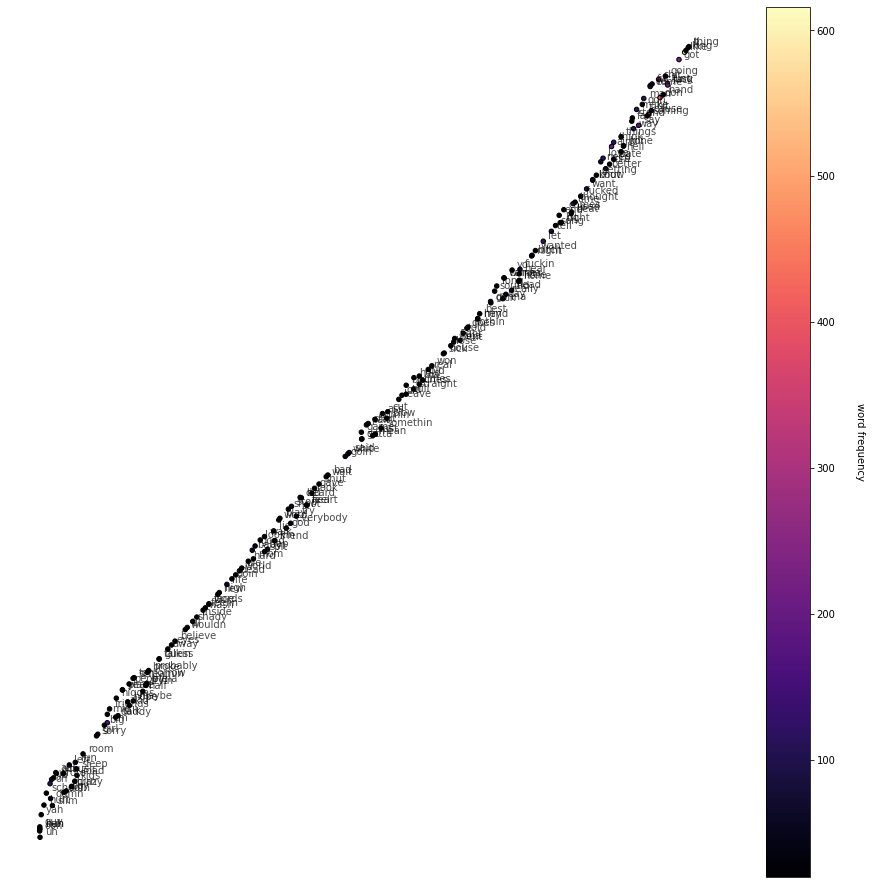

In [ ]:

# plot 2D projections of top n_words_display words
plt.figure(figsize=(16,16))
ax = plt.gca()
cb = ax.scatter(X_tsne[:,0], X_tsne[:,1], s=20, c=freqs_filtered[:n_words_display],
                cmap='magma', edgecolor='black')
cb = plt.colorbar(cb)
cb.set_label('word frequency', rotation=270, labelpad=30)
ax.axis('off')

# annotate each point
for index, word in enumerate(words_sorted[:n_words_display]):
    xy = X_tsne[index]
    ax.annotate(word, xy=xy, xytext=(5,2), textcoords='offset points',
                 alpha=0.7)

In [ ]:
syn = list()
ant = list()
for synset in wordnet.synsets("Good"):
   for lemma in synset.lemmas():
      syn.append(lemma.name())    #add the synonyms
      if lemma.antonyms():    #When antonyms are available, add them into the list
        ant.append(lemma.antonyms()[0].name())
print('Synonyms: ' + str(syn))
print('Antonyms: ' + str(ant))

Synonyms: ['good', 'good', 'goodness', 'good', 'goodness', 'commodity', 'trade_good', 'good', 'good', 'full', 'good', 'good', 'estimable', 'good', 'honorable', 'respectable', 'beneficial', 'good', 'good', 'good', 'just', 'upright', 'adept', 'expert', 'good', 'practiced', 'proficient', 'skillful', 'skilful', 'good', 'dear', 'good', 'near', 'dependable', 'good', 'safe', 'secure', 'good', 'right', 'ripe', 'good', 'well', 'effective', 'good', 'in_effect', 'in_force', 'good', 'good', 'serious', 'good', 'sound', 'good', 'salutary', 'good', 'honest', 'good', 'undecomposed', 'unspoiled', 'unspoilt', 'good', 'well', 'good', 'thoroughly', 'soundly', 'good']
Antonyms: ['evil', 'evilness', 'bad', 'badness', 'bad', 'evil', 'ill']
